In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1, stratify=y)

In [21]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)    
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
>>> from sklearn.linear_model import Perceptron
>>> ppn = Perceptron(eta0=0.1, random_state=1)
>>> ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [7]:
>>> from sklearn.metrics import accuracy_score
>>> print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
 # plot class examples
    for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0],
                       y=X[y == cl, 1],
                       alpha=0.8,
                       c=colors[idx],
                       marker=markers[idx],
                       label=f'Class {cl}',
                       edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='none', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='Test set')

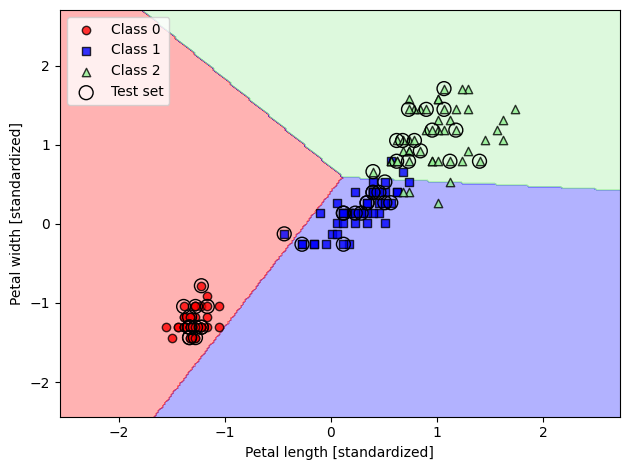

In [9]:
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))
>>> plot_decision_regions(X=X_combined_std,
...
                      y=y_combined,
...
...
                      classifier=ppn,
                      test_idx=range(105, 150))
>>> plt.xlabel('Petal length [standardized]')
>>> plt.ylabel('Petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.tight_layout()
>>> plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\as\AppData\Local\Temp\ipykernel_3680\2588711.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma (z)$')


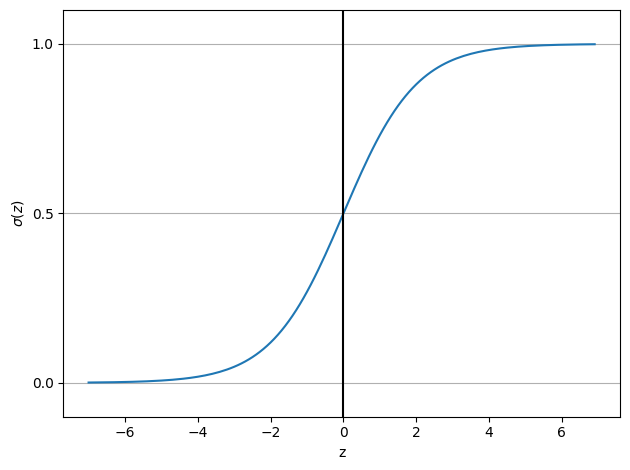

In [10]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> def sigmoid(z):
        return 1.0 / (1.0 + np.exp(-z))     

>>> z = np.arange(-7, 7, 0.1)
>>> sigma_z = sigmoid(z)
>>> plt.plot(z, sigma_z)
>>> plt.axvline(0.0, color='k')
>>> plt.ylim(-0.1, 1.1)
>>> plt.xlabel('z')
>>> plt.ylabel('$\sigma (z)$')
>>> # y axis ticks and gridline
>>> plt.yticks([0.0, 0.5, 1.0])
>>> ax = plt.gca()
>>> ax.yaxis.grid(True)
>>> plt.tight_layout()
>>> plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\as\AppData\Local\Temp\ipykernel_3680\3028127511.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


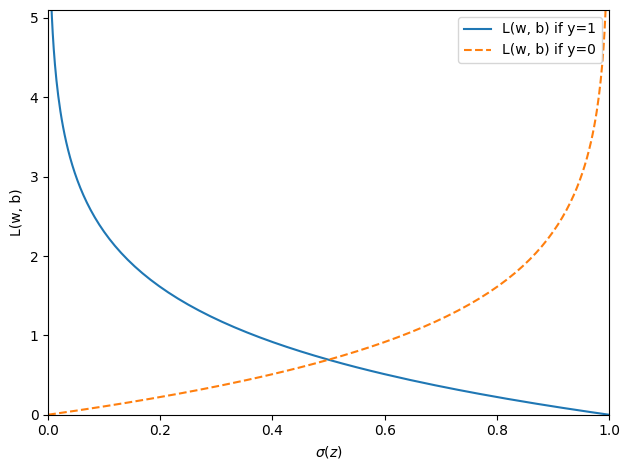

In [22]:
def loss_1(z):
        return - np.log(sigmoid(z))
def loss_0(z): 
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
from logistic import LogisticRegressionGD

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [13]:
lrgd  = LogisticRegressionGD(eta=0.3, n_iter= 1000, random_state = 1 )
lrgd.fit(X_train_01_subset,y_train_01_subset)

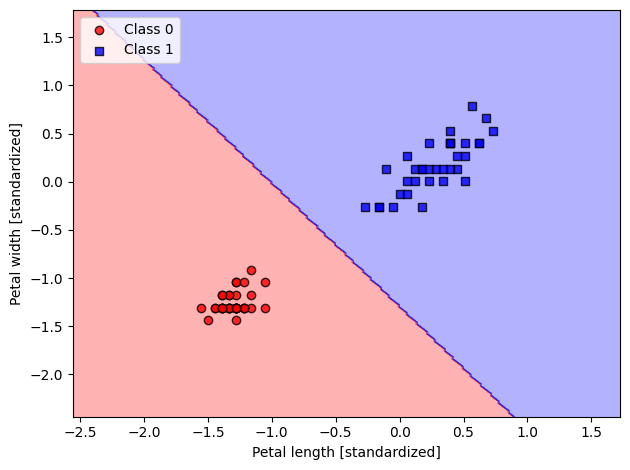

In [14]:
plot_decision_regions(X=X_train_01_subset,
y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression(C=100.0,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std, y_train)

c:\Users\as\anaconda3\envs\RAG\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr')

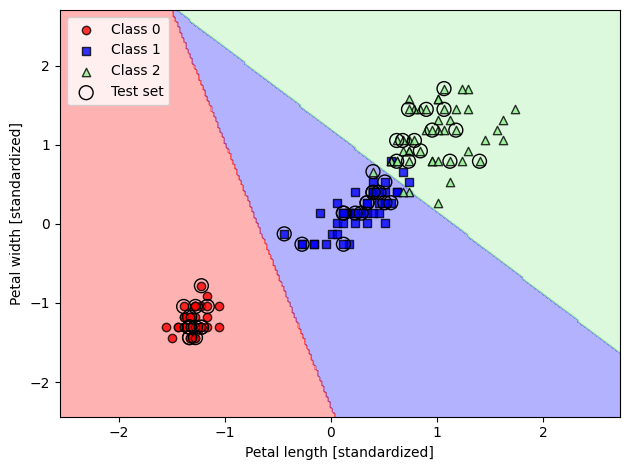

In [17]:
plot_decision_regions(X_combined_std,
                       y_combined,
                       classifier=lr,
                       test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')

plt.ylabel('Petal width [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()


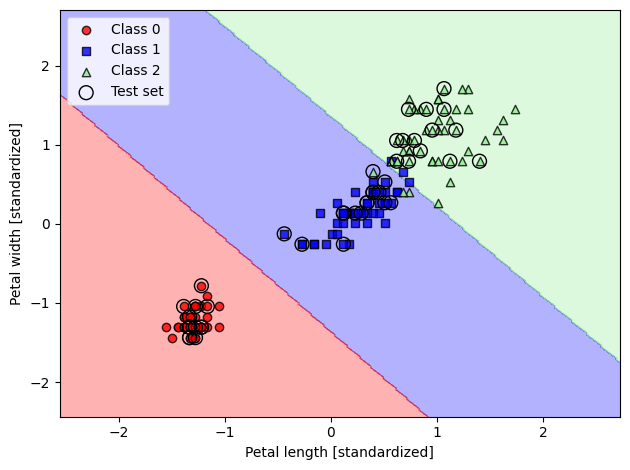

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                  y_combined,
                  classifier=svm,
                  test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

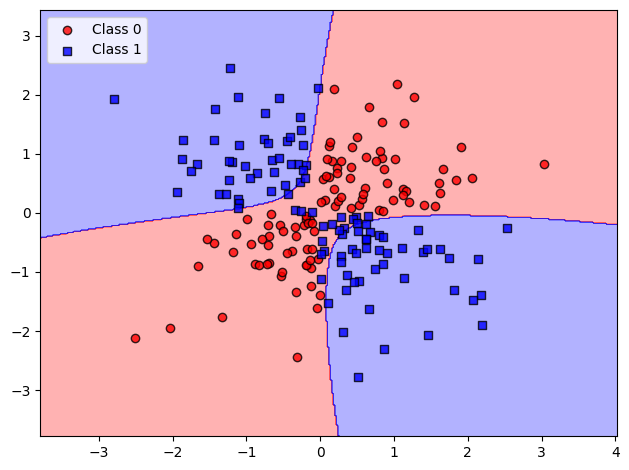

In [28]:
svm = SVC(kernel='rbf', C=10, random_state=1,gamma=0.1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

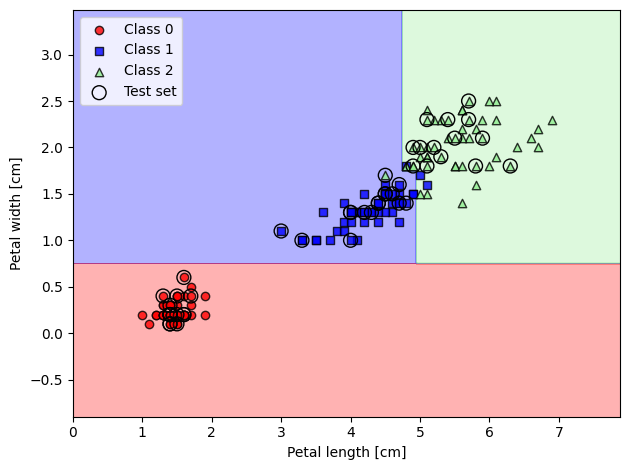

In [30]:
>>> from sklearn.tree import DecisionTreeClassifier
>>> tree_model = DecisionTreeClassifier(criterion='gini',
...
                                    max_depth=4,
...
                                    random_state=1)
>>> tree_model.fit(X_train, y_train)
>>> X_combined = np.vstack((X_train, X_test))
>>> y_combined = np.hstack((y_train, y_test))
>>> plot_decision_regions(X_combined,
...
                      y_combined,
...
...
                      classifier=tree_model,
                      test_idx=range(105, 150))
>>> plt.xlabel('Petal length [cm]')
>>> plt.ylabel('Petal width [cm]')
>>> plt.legend(loc='upper left')
>>> plt.tight_layout()
>>> plt.show()